## Paso 1: Cargar los Datos
Primero, cargamos el archivo CSV en un DataFrame de pandas para poder manipular y analizar los datos.

In [14]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/Users/34677/Downloads/GLB.Ts+dSST.csv')

# Mostrar las primeras filas del DataFrame para entender su estructura
print(df.head())


                                                                                                                                             Global Temperature Anomalies (deg C) AIRS v6 vs. 2007-2016
Year Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec     J-D     D-N     DJF     MAM     JJA                                                    SON        
2002 ******* ******* ******* ******* ******* ******* ******* *******  -0.094  -0.203  -0.273  -0.243 ******* ******* ******* ******* *******                                             -0.190        
2003   0.035  -0.069  -0.099  -0.140  -0.164  -0.203  -0.191  -0.147  -0.091   0.022  -0.578   0.023  -0.134  -0.156  -0.093  -0.134  -0.181                                             -0.216        
2004   0.059   0.107  -0.080  -0.173  -0.450  -0.229  -0.344  -0.326  -0.252  -0.236  -0.107  -0.140  -0.181  -0.167   0.063  -0.234  -0.299                                             -0.199        


## Paso 2: Limpiar y Preparar los Datos
Vamos a limpiar los datos y asegurarnos de que estén en un formato adecuado para el análisis.

### Verificar Duplicados
Vamos a verificar si hay duplicados en los años.

In [31]:
# Verificar si hay duplicados en la columna 'Year'
print(df['Year'].duplicated().sum())


47


### Eliminar Duplicados (si es necesario)
Si hay duplicados, los eliminaremos.

In [32]:
# Eliminar duplicados si existen
df = df.drop_duplicates(subset=['Year'])


### Verificar y Limpiar Datos
Vamos a asegurarnos de que cada año tenga una sola media anual asociada.

In [33]:
# Verificar si cada año tiene un solo valor de 'Annual_Mean'
yearly_means = df.groupby('Year')['Annual_Mean'].mean().reset_index()

# Mostrar el DataFrame limpio
print(yearly_means.head())


   Year  Annual_Mean
0  2002          NaN
1  2003       -0.134
2  2004       -0.181
3  2005       -0.021
4  2006       -0.080


In [25]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/Users/34677/Downloads/GLB.Ts+dSST.csv', skiprows=1)

# Renombrar las columnas para hacerlas más comprensibles
df.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']

# Reemplazar valores de '***' con NaN (Not a Number) para manejar datos faltantes
df.replace('***', pd.NA, inplace=True)
df.replace('*******', pd.NA, inplace=True)


# Convertir las columnas de meses a tipo numérico
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D','D-N','DJF','MAM','JJA','SON']
df[months] = df[months].apply(pd.to_numeric, errors='coerce')

# Mostrar las primeras filas después de la limpieza
print(df.head())


   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
0  2002    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN -0.094 -0.203   
1  2003  0.035 -0.069 -0.099 -0.140 -0.164 -0.203 -0.191 -0.147 -0.091  0.022   
2  2004  0.059  0.107 -0.080 -0.173 -0.450 -0.229 -0.344 -0.326 -0.252 -0.236   
3  2005  0.041 -0.098 -0.009 -0.013 -0.006  0.012 -0.025 -0.111 -0.069  0.021   
4  2006 -0.018  0.217 -0.054 -0.162 -0.198 -0.003 -0.154 -0.115 -0.176 -0.137   

     Nov    Dec    J-D    D-N    DJF    MAM    JJA    SON  
0 -0.273 -0.243    NaN    NaN    NaN    NaN    NaN -0.190  
1 -0.578  0.023 -0.134 -0.156 -0.093 -0.134 -0.181 -0.216  
2 -0.107 -0.140 -0.181 -0.167  0.063 -0.234 -0.299 -0.199  
3 -0.022  0.026 -0.021 -0.035 -0.066 -0.009 -0.041 -0.024  
4 -0.103 -0.056 -0.080 -0.073  0.075 -0.138 -0.091 -0.139  


### skiprows=1:
Algunos archivos CSV tienen filas de encabezado adicionales que pueden causar problemas. Aquí, asumimos que la primera fila puede ser un encabezado adicional y la omitimos.
### ¿Qué es '***'?
En este contexto, *** es un valor en el archivo de datos que indica que la información no está disponible o que falta. Es una forma de marcar que no se pudo registrar la temperatura para ese mes en particular.
### ¿Qué es NaN?
NaN: Significa "Not a Number" (no es un número). Es una forma de representar valores faltantes en las tablas de datos.
### Uso de .replace(): 
En este caso, se usa para buscar todos los *** en el DataFrame y reemplazarlos con NaN.
### Uso de inplace=True: 
Hace que el reemplazo de *** por NaN se aplique directamente a los datos originales, sin necesidad de asignar los cambios a una nueva variable.
### months:
Facilitar la referencia a estas columnas sin tener que escribir sus nombres cada vez.
### df[months]: 
Selecciona las columnas del DataFrame df que corresponden a los nombres de los meses (es decir, las columnas "Jan", "Feb", etc.).
### .apply:
Es un método que permite aplicar una función a cada columna del DataFrame seleccionado.
### pd.to_numeric:
Es una función de pandas que convierte los valores de las columnas a números.
### errors='coerce':
Es una opción que le dice a pd.to_numeric que, si encuentra un valor que no puede convertir a un número (como texto), lo reemplace con NaN (valor faltante).


# Paso 3: Calcular y Graficar la Media Anual
Ahora, calculamos la media anual y creamos el gráfico.

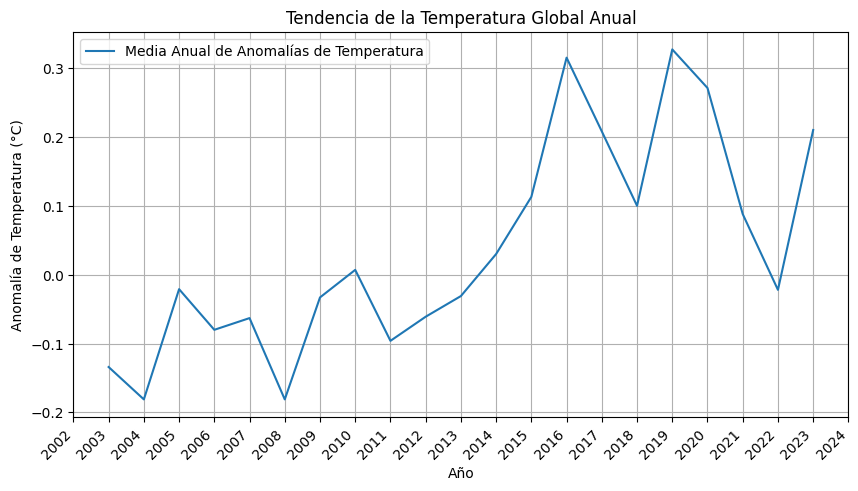

In [35]:
import matplotlib.pyplot as plt

# Crear un gráfico de la media anual de las anomalías de temperatura con datos limpios
plt.figure(figsize=(10, 5))
plt.plot(yearly_means['Year'], yearly_means['Annual_Mean'], label='Media Anual de Anomalías de Temperatura')
plt.xlabel('Año')
plt.ylabel('Anomalía de Temperatura (°C)')
plt.title('Tendencia de la Temperatura Global Anual')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

### matplotlib.pyplot:
Matplotlib es una biblioteca que se usa para crear gráficos en Python. Aquí la importamos para poder usarla.
### if 'J-D' in df.columns:
Esta línea verifica si la columna 'J-D' está presente en nuestra tabla de datos (DataFrame). Antes de intentar usar datos de una columna, necesitamos asegurarnos de que la columna realmente existe para evitar errores.
### df['Annual_Mean'] = df['J-D'].astype(float):
Si la columna 'J-D' existe, esta línea toma los valores de esa columna, los convierte a números decimales (flotantes) y los guarda en una nueva columna llamada 'Annual_Mean'. La columna 'J-D' representa la anomalía de temperatura promedio anual, y queremos trabajar con estos valores para crear nuestro gráfico.
### plt.figure(figsize=(10, 5)): 
Configura el tamaño del gráfico
### plt.plot(df['Year'], df['Annual_Mean'], label='Media Anual de Anomalías de Temperatura'): 
Crea el gráfico de líneas, usando el año en el eje x y la media anual en el eje y.
### plt.xlabel('Año'): 
Etiqueta el eje x como "Año".
### plt.ylabel('Anomalía de Temperatura (°C)'):
Etiqueta el eje y como "Anomalía de Temperatura (°C)".
### plt.title('Tendencia de la Temperatura Global Anual'):
Título del gráfico.
### plt.legend():
Muestra una leyenda que identifica la línea del gráfico.
### plt.grid(True): 
Añade una cuadrícula al gráfico para facilitar la lectura.
### plt.show(): 
Muestra el gráfico en la pantalla.

## Interpretación del Gráfico
El gráfico muestra cómo han cambiado las anomalías de temperatura global anual a lo largo del tiempo. Cada punto en la línea representa la diferencia entre la temperatura medida en un año específico y una temperatura de referencia promedio. Si el valor es positivo, significa que la temperatura de ese año fue más alta que la temperatura promedio de referencia. Si es negativo, la temperatura fue más baja.

Desde el año 2000 hasta 2023, se observa una tendencia general al aumento de las anomalías de temperatura. Esto indica que, en promedio, las temperaturas globales están aumentando con el tiempo.

Hay algunas fluctuaciones (subidas y bajadas) a lo largo de los años. Sin embargo, la tendencia general sigue siendo hacia el aumento.
Por ejemplo, hay una notable subida de la temperatura alrededor del año 2015, seguida de una caída y luego otro aumento significativo hacia 2023.

Los picos representan años con anomalías de temperatura significativamente más altas que el promedio, mientras que los valles representan años con anomalías más bajas.
Los picos más altos se observan en los años recientes, lo que sugiere que los años más cálidos han sido en la última década.

## Conclusión
La tendencia general de las anomalías de temperatura globales muestra un claro aumento a lo largo del tiempo, lo que indica que el planeta se está calentando. Este calentamiento no es uniforme cada año, ya que hay fluctuaciones, pero la dirección general es hacia temperaturas más altas. Este patrón es consistente con lo que se espera del cambio climático global, donde las actividades humanas, como la emisión de gases de efecto invernadero, están contribuyendo al aumento de las temperaturas globales. Es importante seguir monitoreando estas tendencias para entender mejor el impacto del cambio climático y tomar medidas para mitigarlo.